In [40]:
import torch
import pickle
import matplotlib.pyplot as plt

In [11]:
import eigencharacter as ec
from eigencharacter.neural import VAE
from collections import namedtuple

In [ ]:
import numpy as np
from torchvision.utils import make_grid

In [13]:
Parameter = namedtuple('Parameter', ['fc', 'vae'])

In [27]:
m_path = ec.get_resource_path('', 'character_M.pkl')
with open(m_path, "rb") as fin:
    M = pickle.load(fin)
in_dim = M.shape[0]

In [60]:
model_path_a = ec.get_cache_path('EC_vae', '') / 'exp_a/vae_model_exp_a.pth'
model_path_b = ec.get_cache_path('EC_vae', '') / 'exp_b/vae_model_exp_b.pth'
model_path_c = ec.get_cache_path('EC_vae', '') / 'exp_c/vae_model_exp_c.pth'

param_a = Parameter( 100,  10)
param_b = Parameter( 500,  50)
param_c = Parameter(1000, 100)

## VAE - A

In [96]:
def show_vae_node(model_path, param):
    vae = VAE(in_dim, param.fc, param.vae)
    vae.load_state_dict(torch.load(model_path))
    A = torch.eye(param.vae, param.vae)*5
    with torch.no_grad():
        recons = vae.decode(A)
    grid=make_grid(recons.view(param.vae, 1, 75, 64), nrow=10)
    fig = plt.figure(figsize=(12,8))        
    plt.axis('off')
    plt.imshow(np.transpose(grid, [1,2,0]))
    fig.savefig(str(model_path).replace(".pth", "_vae_recon.png"), bbox_inches='tight')

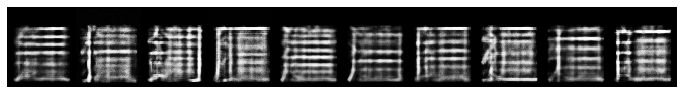

In [97]:
show_vae_node(model_path_a, param_a)

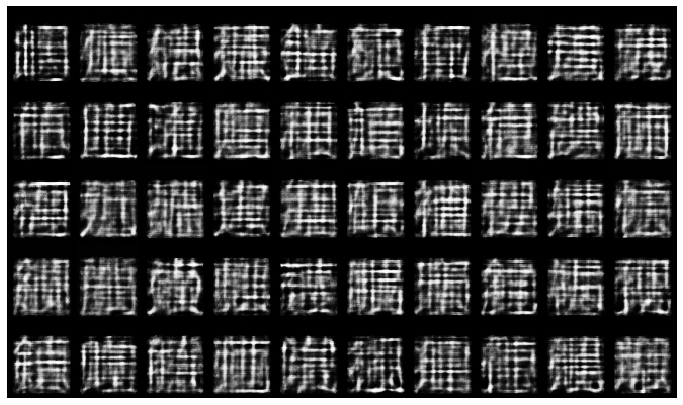

In [98]:
show_vae_node(model_path_b, param_b)

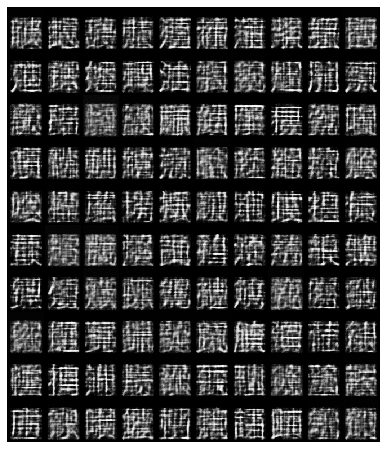

In [99]:
show_vae_node(model_path_c, param_c)

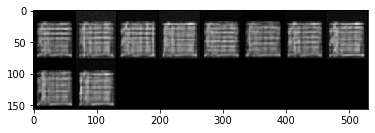